## Vinos

Este ejemplo demuestra cómo PCA puede aplicarse a un problema de clasificación de vinos, reduciendo la dimensionalidad de los datos mientras se retiene la mayor parte de la información relevante. Permite visualizar cómo las diferentes clases de vinos se separan en el espacio de las componentes principales, lo cual puede ser útil para el análisis exploratorio de datos y como paso previo a la aplicación de algoritmos de clasificación.

Cargar un dataset

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

Normalizar el dataset

In [60]:
# Cargar el dataset
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
print('Forma del DataFrame original:', df.shape)


Forma del DataFrame original: (178, 13)


In [61]:
# Normalizar el dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [62]:
# Calcular la matriz de covarianza
cov_matrix = np.cov(X_scaled.T)

Calcular covarianza

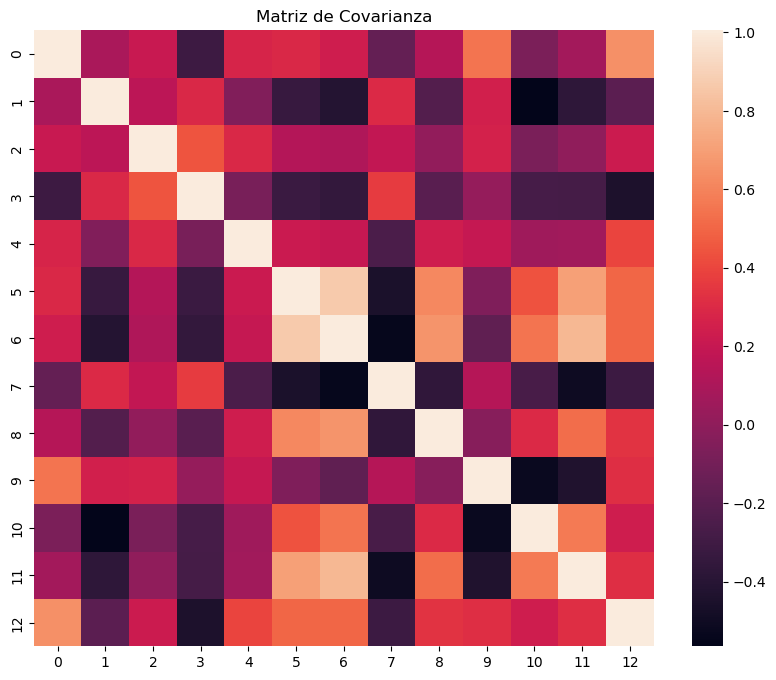

In [64]:
# Visualizar la matriz de covarianza
plt.figure(figsize=(10, 8))
sns.heatmap(cov_matrix, annot=False)
plt.title('Matriz de Covarianza')
plt.show()

Calcular los eigenvalores y los eigenvectores.
Estos se calculan por rasgos

In [66]:
# Calcular los eigenvalores y eigenvectores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

Ordenar eigenvalores y eigenvectores

In [67]:
# Ordenar eigenvalores y eigenvectores
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

Suma acumulativa de eigenvalores, aportación de información

In [68]:
explained_var_ratio = np.cumsum(eigenvalues) / np.sum(eigenvalues)

Nos quedamos con el número de componentes que garanticen el 50% de la info.

In [69]:
# Determinar el número de componentes para explicar el 50% de la varianza
n_components = np.argmax(explained_var_ratio >= 0.50) + 1
print(f"Número de componentes para explicar el 80% de la varianza: {n_components}")


Número de componentes para explicar el 80% de la varianza: 2


Aplicar PCA

In [70]:
# Aplicar PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

Crear un DataFrame con los resultados de PCA

In [71]:
df_pca = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

Visualizar los resultados

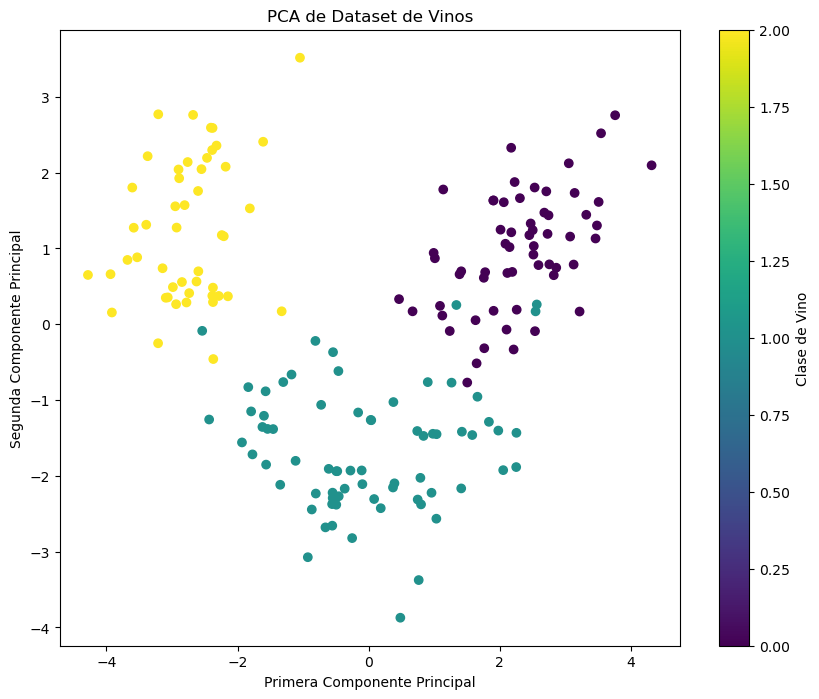

In [72]:
plt.figure(figsize=(10, 8))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=wine.target, cmap='viridis')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.title('PCA de Dataset de Vinos')
plt.colorbar(label='Clase de Vino')
plt.show()

Imprimir la varianza explicada por cada componente

In [57]:
# 
print("Varianza explicada por cada componente:")
print(pca.explained_variance_ratio_)

array([[ 0.40814259,  0.53198612, -0.02785611,  0.15959029,  0.14544485,
         0.01368981,  0.70910067],
       [ 0.5415719 , -0.44500785,  0.14239474,  0.52754794, -0.45730996,
        -0.03067362,  0.00339552]])